In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv("data/data_rank.csv")

In [4]:
def result_finder(home, away):
    if home > away:
        return pd.Series([0, 3, 0])
    if home < away:
        return pd.Series([1, 0, 3])
    else:
        return pd.Series([2, 1, 1])

results = df.apply(lambda x: result_finder(x["home_score"], x["away_score"]), axis=1)

In [5]:
df[["result", "home_team_points", "away_team_points"]] = results

<AxesSubplot:>

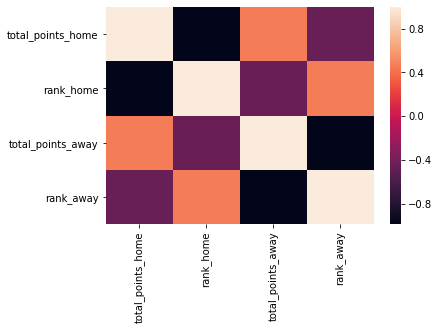

In [6]:
import seaborn as sns

sns.heatmap(df[["total_points_home", "rank_home", "total_points_away", "rank_away"]].corr())

In [7]:
df["rank_dif"] = df["rank_home"] - df["rank_away"]
df["sg"] = df["home_score"] - df["away_score"]
df["points_home_by_rank"] = df["home_team_points"]/df["rank_away"]
df["points_away_by_rank"] = df["away_team_points"]/df["rank_home"]

In [8]:
home_team = df[["date", "home_team", "home_score", "away_score", "rank_home", "rank_away","rank_change_home", "total_points_home", "result", "rank_dif", "points_home_by_rank", "home_team_points"]]

away_team = df[["date", "away_team", "away_score", "home_score", "rank_away", "rank_home","rank_change_away", "total_points_away", "result", "rank_dif", "points_away_by_rank", "away_team_points"]]

In [9]:
home_team.columns = [h.replace("home_", "").replace("_home", "").replace("away_", "suf_").replace("_away", "_suf") for h in home_team.columns]

away_team.columns = [a.replace("away_", "").replace("_away", "").replace("home_", "suf_").replace("_home", "_suf") for a in away_team.columns]

In [10]:
team_stats = home_team.append(away_team)#.sort_values("date")


In [11]:
team_stats

,date,team,score,suf_score,rank,rank_suf,rank_change,total_points,result,rank_dif,points_by_rank,team_points
0,2019-09-29,Bangladesh,4.0,1.0,187.0,185.0,5.0,912.00,0,2.0,0.016216,3
1,2019-09-30,Botswana,0.0,0.0,148.0,152.0,1.0,1059.00,2,-4.0,0.006579,1
2,2019-10-02,Mexico,2.0,0.0,12.0,100.0,0.0,1603.00,0,-88.0,0.030000,3
3,2019-10-03,Bangladesh,2.0,0.0,187.0,185.0,5.0,912.00,0,2.0,0.016216,3
4,2019-10-05,Jordan,0.0,0.0,98.0,157.0,-1.0,1235.00,2,-59.0,0.006369,1
5,2019-10-05,Malaysia,6.0,0.0,158.0,202.0,-1.0,1015.00,0,-44.0,0.014851,3
6,2019-10-09,Liberia,1.0,0.0,152.0,177.0,0.0,1053.00,0,-25.0,0.016949,3
7,2019-10-09,South Sudan,2.0,1.0,173.0,198.0,4.0,977.00,0,-25.0,0.015152,3
8,2019-10-09,Bahrain,2.0,3.0,105.0,109.0,-4.0,1206.00,1,-4.0,0.000000,0
9,2019-10-09,Germany,2.0,2.0,16.0,10.0,1.0,1580.00,2,6.0,0.100000,1


In [12]:
stats_val = []

for index, row in team_stats.iterrows():
    team = row["team"]
    date = row["date"]
    past_games = team_stats.loc[(team_stats["team"] == team) & (team_stats["date"] < date)].sort_values(by=['date'], ascending=False)
    last5 = past_games.head(5)
    
    goals = past_games["score"].mean()
    goals_l5 = last5["score"].mean()
    
    goals_suf = past_games["suf_score"].mean()
    goals_suf_l5 = last5["suf_score"].mean()
    
    rank = past_games["rank_suf"].mean()
    rank_l5 = last5["rank_suf"].mean()
    
    if len(last5) > 0:
        points = past_games["total_points"].values[0] - past_games["total_points"].values[-1]#qtd de pontos ganhos
        points_l5 = last5["total_points"].values[0] - last5["total_points"].values[-1] 
    else:
        points = 0
        points_l5 = 0
        
    gp = past_games["team_points"].mean()
    gp_l5 = last5["team_points"].mean()
    
    gp_rank = past_games["points_by_rank"].mean()
    gp_rank_l5 = last5["points_by_rank"].mean()
    
    stats_val.append([goals, goals_l5, goals_suf, goals_suf_l5, rank, rank_l5, points, points_l5, gp, gp_l5, gp_rank, gp_rank_l5])

In [13]:
stats_mean = ["goals_mean", "goals_mean_l5", "goals_suf_mean", "goals_suf_mean_l5", "rank_mean", "rank_mean_l5", "points_mean", "points_mean_l5", "game_points_mean", "game_points_mean_l5", "game_points_rank_mean", "game_points_rank_mean_l5"]


In [14]:
stats_df = pd.DataFrame(stats_val, columns=stats_mean)

full_df = pd.concat([team_stats.reset_index(drop=True), stats_df], axis=1, ignore_index=False)

In [15]:
home_team_stats = full_df.iloc[:int(full_df.shape[0]/2),:]
away_team_stats = full_df.iloc[int(full_df.shape[0]/2):,:]

In [16]:
home_team_stats = home_team_stats[home_team_stats.columns[-12:]]
away_team_stats = away_team_stats[away_team_stats.columns[-12:]]

In [17]:
home_team_stats.columns = ['home_'+str(col) for col in home_team_stats.columns]
away_team_stats.columns = ['away_'+str(col) for col in away_team_stats.columns]

In [18]:
match_stats = pd.concat([home_team_stats, away_team_stats.reset_index(drop=True)], axis=1, ignore_index=False)


In [19]:
full_df = pd.concat([df, match_stats.reset_index(drop=True)], axis=1, ignore_index=False)


In [20]:
def find_friendly(x):
    if x == "Friendly":
        return 1
    else: return 0

full_df["is_friendly"] = full_df["tournament"].apply(lambda x: find_friendly(x)) 

In [21]:
full_df = pd.get_dummies(full_df, columns=["is_friendly"])

In [22]:
base_df = full_df[["date", "home_team", "away_team", "rank_home", "rank_away","home_score", "away_score","result", "rank_dif", "rank_change_home", "rank_change_away", 'home_goals_mean',
       'home_goals_mean_l5', 'home_goals_suf_mean', 'home_goals_suf_mean_l5',
       'home_rank_mean', 'home_rank_mean_l5', 'home_points_mean',
       'home_points_mean_l5', 'away_goals_mean', 'away_goals_mean_l5',
       'away_goals_suf_mean', 'away_goals_suf_mean_l5', 'away_rank_mean',
       'away_rank_mean_l5', 'away_points_mean', 'away_points_mean_l5','home_game_points_mean', 'home_game_points_mean_l5',
       'home_game_points_rank_mean', 'home_game_points_rank_mean_l5','away_game_points_mean',
       'away_game_points_mean_l5', 'away_game_points_rank_mean',
       'away_game_points_rank_mean_l5',
       'is_friendly_0', 'is_friendly_1']]

In [23]:
base_df_no_fg = base_df.dropna()

In [24]:
base_df_no_fg.to_csv("data/full_db.csv", index=False)


In [25]:
df = base_df_no_fg.copy()

In [26]:
df['total_games_away'] = df.apply(lambda x: len(df[(df.home_team == x["away_team"]) & (df.date < x["date"])])+len(df[(df.away_team == x["away_team"]) & (df.date < x["date"])]), axis=1)

In [27]:
df['total_games_home'] = df.apply(lambda x: len(df[(df.home_team == x["home_team"]) & (df.date < x["date"])])+len(df[(df.away_team == x["home_team"]) & (df.date < x["date"])]), axis=1)

In [28]:
df = df[df.rank_home != df.rank_away]

In [29]:
df['home_weight_goals'] = df.apply(lambda x: (x["home_goals_mean"]*x["rank_dif"]), axis =1)

In [30]:
df['away_weight_goals_suf'] = df.apply(lambda x: (x["away_goals_suf_mean"]*x["rank_dif"]), axis =1)

In [31]:
df['home_weight_goals_l5'] = df.apply(lambda x: (x["home_goals_mean_l5"]*x["rank_dif"]), axis =1)

In [32]:
df['away_weight_goals_suf_l5'] = df.apply(lambda x: (x["away_goals_suf_mean_l5"]*x["rank_dif"]), axis =1)

In [33]:
df['home_weight_points'] = df.apply(lambda x: (x["home_game_points_mean"]*x["rank_dif"]), axis =1)

In [34]:
df['away_weight_points'] = df.apply(lambda x: (x["away_game_points_mean"]*x["rank_dif"]), axis =1)

In [35]:
df['away_weight_goals'] = df.apply(lambda x: (x["away_goals_mean"]*x["rank_dif"]), axis =1)
df['home_weight_goals_suf'] = df.apply(lambda x: (x["home_goals_suf_mean"]*x["rank_dif"]), axis =1)

In [36]:
df['away_weight_goals_l5'] = df.apply(lambda x: (x["away_goals_mean_l5"]*x["rank_dif"]), axis =1)
df['home_weight_goals_suf_l5'] = df.apply(lambda x: (x["home_goals_suf_mean_l5"]*x["rank_dif"]), axis =1)

In [37]:
df.to_csv("data/new_model.csv", index=False)

In [38]:
df_model = df[(df.total_games_home > 5) & (df.total_games_away > 5)]

In [39]:
df_model.corr()

,rank_home,rank_away,home_score,away_score,result,rank_dif,rank_change_home,rank_change_away,home_goals_mean,home_goals_mean_l5,...,home_weight_goals,away_weight_goals_suf,home_weight_goals_l5,away_weight_goals_suf_l5,home_weight_points,away_weight_points,away_weight_goals,home_weight_goals_suf,away_weight_goals_l5,home_weight_goals_suf_l5
rank_home,1.000000,0.434335,-0.241476,0.267769,0.157417,0.540566,0.016159,-0.002367,-0.638373,-0.423104,...,0.481315,0.421999,0.447927,0.412354,0.480623,0.530865,0.509974,0.536533,0.479948,0.502666
rank_away,0.434335,1.000000,0.263715,-0.209504,-0.179347,-0.523017,-0.005684,-0.004487,-0.234422,-0.111132,...,-0.481263,-0.538683,-0.446591,-0.504135,-0.499230,-0.445563,-0.445710,-0.418371,-0.414676,-0.399476
home_score,-0.241476,0.263715,1.000000,-0.203761,-0.531658,-0.474803,-0.025193,0.017813,0.273094,0.214727,...,-0.495924,-0.473400,-0.458419,-0.450535,-0.490162,-0.403833,-0.396206,-0.383013,-0.371386,-0.356446
away_score,0.267769,-0.209504,-0.203761,1.000000,0.267532,0.449048,0.040412,0.019637,-0.209814,-0.151408,...,0.378966,0.376815,0.350432,0.362127,0.378314,0.448022,0.454406,0.459494,0.424451,0.432623
result,0.157417,-0.179347,-0.531658,0.267532,1.000000,0.316464,0.040521,-0.007080,-0.177560,-0.140153,...,0.325941,0.298994,0.303301,0.290402,0.327459,0.277453,0.264672,0.240959,0.248603,0.225213
rank_dif,0.540566,-0.523017,-0.474803,0.449048,0.316464,1.000000,0.020600,0.001951,-0.385100,-0.296559,...,0.904936,0.902440,0.840960,0.861045,0.921063,0.918479,0.898848,0.898444,0.841451,0.848751
rank_change_home,0.016159,-0.005684,-0.025193,0.040412,0.040521,0.020600,1.000000,-0.062396,-0.088782,-0.126997,...,0.024621,0.009750,0.036830,-0.001544,0.031411,0.021780,0.019638,0.008700,0.017961,0.001375
rank_change_away,-0.002367,-0.004487,0.017813,0.019637,-0.007080,0.001951,-0.062396,1.000000,-0.009581,0.016512,...,-0.010805,0.006245,-0.012810,0.001973,-0.006628,-0.001854,0.004756,0.016219,0.005851,0.025041
home_goals_mean,-0.638373,-0.234422,0.273094,-0.209814,-0.177560,-0.385100,-0.088782,-0.009581,1.000000,0.686040,...,-0.408797,-0.289283,-0.388589,-0.284052,-0.369824,-0.401978,-0.385264,-0.368315,-0.359938,-0.344274
home_goals_mean_l5,-0.423104,-0.111132,0.214727,-0.151408,-0.140153,-0.296559,-0.126997,0.016512,0.686040,1.000000,...,-0.323795,-0.228507,-0.398900,-0.222016,-0.292821,-0.308310,-0.293821,-0.275052,-0.275356,-0.253169
